In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions="/mnt/workspace_stud/stud4/WP6_data/right-lobe-of-liver.11.bed", 
                   motifs="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme",
                   genome="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/homo_sapiens.104.mainChr.fa", 
                   threads=8)


#### running count_within() with stranded option turned on

In [3]:
C.count_within(stranded=True, threads=8)
C.market_basket()

### Analyze preferential orientation of motifs

##### First, we create a directionality analysis for the rules found:


In [4]:
df_orientation = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [5]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF15-KLF5,KLF15,KLF5,4983,0.864941,0.135059,0.516104,0.0
KLF15-KLF16,KLF15,KLF16,3408,0.855340,0.144660,0.502527,0.0
KLF15-SP9,KLF15,SP9,3322,0.866948,0.133052,0.518942,0.0
KLF15-SP3,KLF15,SP3,3305,0.868079,0.131921,0.520542,0.0
KLF15-KLF15,KLF15,KLF15,3274,0.849420,0.150580,0.494154,0.0


We can subset these on pvalue and number of sites:

In [6]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.01)
              & (df_orientation["TF1_TF2_count"] > 50)]

In [7]:
#Number of TF pairs with significant differences in orientation
orientation_selected.shape[0]

1021

### Visualization of orientation preference

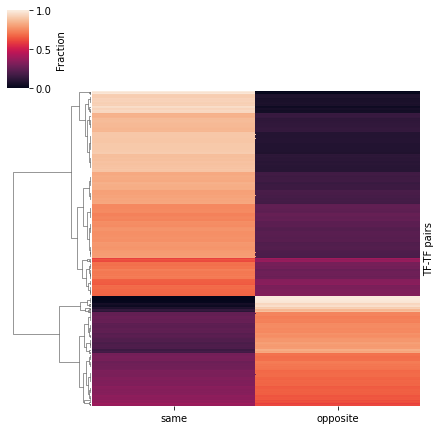

In [8]:
orientation_heatmap=orientation_selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [9]:
#orientation_selected.sort_values("same").tail(5)

In [10]:
#orientation_selected.sort_values("opposite").tail(5)


### Extended analysis with directional=True

#### The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or


In [11]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()


In [12]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [13]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF15-KLF15,KLF15,KLF15,6055,0.459290,0.459290,0.038481,0.042940,0.241674,0.0
KLF15-KLF5,KLF15,KLF5,4983,0.433875,0.431066,0.062212,0.072848,0.210747,0.0
KLF5-KLF5,KLF5,KLF5,4479,0.473097,0.473097,0.025229,0.028578,0.257613,0.0
KLF15-KLF16,KLF15,KLF16,3408,0.416373,0.438967,0.068369,0.076291,0.205389,0.0
KLF15-SP9,KLF15,SP9,3322,0.421433,0.445515,0.060807,0.072246,0.212137,0.0


similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [14]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05)
              & (df_orientation["TF1_TF2_count"] > 50)]             

In [15]:
orientation_selected.shape[0]

1174

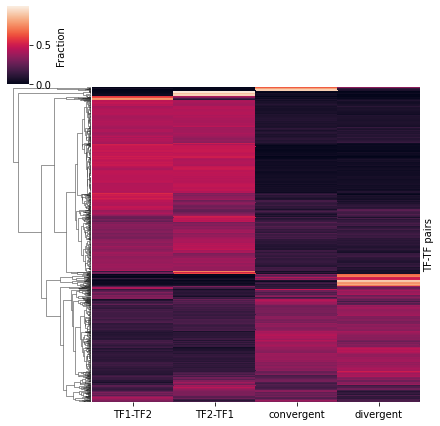

In [16]:
orientation_heatmap = orientation_selected.plot_heatmap()


### In-depth look at preferential orientation



By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.


#### TFs specific in TF1-TF2 orientation

In [17]:
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
Gfi1b-ZNF460,Gfi1b,ZNF460,90,0.866667,0.033333,0.055556,0.044444,0.411211,2.394220e-39
CEBPGvar.2-ZNF460,CEBPGvar.2,ZNF460,64,0.828125,0.078125,0.062500,0.031250,0.385909,1.254985e-24
Foxd3-ZNF460,Foxd3,ZNF460,135,0.770370,0.177778,0.029630,0.022222,0.354235,8.243222e-44
IRF1-ZNF460,IRF1,ZNF460,230,0.756522,0.108696,0.078261,0.056522,0.338358,3.454522e-68
CEBPGvar.2-ZNF135,CEBPGvar.2,ZNF135,52,0.711538,0.173077,0.076923,0.038462,0.312857,3.460485e-13
ZNF135-Zfx,ZNF135,Zfx,138,0.702899,0.072464,0.144928,0.079710,0.303686,6.807335e-33
IRF1-ZNF135,IRF1,ZNF135,133,0.699248,0.187970,0.082707,0.030075,0.306608,2.586168e-32
Nr1h3Rxra-ZNF135,Nr1h3Rxra,ZNF135,55,0.690909,0.254545,0.054545,0.000000,0.313647,5.198958e-14
ZNF354C-ZNF460,ZNF354C,ZNF460,307,0.687296,0.123779,0.091205,0.097720,0.291870,1.008108e-67
Foxd3-ZNF135,Foxd3,ZNF135,83,0.662651,0.301205,0.000000,0.036145,0.306124,4.203396e-20


#### TFs specific in TF2-TF1 orientation

In [18]:
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
MEF2D-Nr2f6var.2,MEF2D,Nr2f6var.2,133,0.015038,0.984962,0.000000,0.000000,0.490026,9.444205e-83
MEF2D-Rarg,MEF2D,Rarg,114,0.008772,0.973684,0.017544,0.000000,0.482509,9.893606e-69
MEF2C-Rarg,MEF2C,Rarg,104,0.009615,0.971154,0.009615,0.009615,0.480769,3.125033e-62
MEF2A-Rarg,MEF2A,Rarg,125,0.016000,0.968000,0.008000,0.008000,0.478682,3.442827e-74
MEF2D-SREBF1var.2,MEF2D,SREBF1var.2,61,0.016393,0.967213,0.000000,0.016393,0.478205,4.648969e-36
MEF2A-Nr2f6var.2,MEF2A,Nr2f6var.2,148,0.013514,0.966216,0.006757,0.013514,0.477488,1.903999e-87
MEF2C-SREBF1var.2,MEF2C,SREBF1var.2,58,0.034483,0.965517,0.000000,0.000000,0.477288,3.764175e-34
MEF2C-Nr2f6var.2,MEF2C,Nr2f6var.2,124,0.008065,0.959677,0.016129,0.016129,0.473134,6.815187e-72
MEF2D-Rarb,MEF2D,Rarb,51,0.039216,0.921569,0.039216,0.000000,0.448094,1.847621e-26
MEF2A-SREBF1var.2,MEF2A,SREBF1var.2,70,0.071429,0.914286,0.000000,0.014286,0.443931,1.166328e-35



#### TFs specific in convergent orientation

In [19]:
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF6-MEF2A,KLF6,MEF2A,54,0.018519,0.018519,0.944444,0.018519,0.462963,6.561885e-30
KLF2-MEF2A,KLF2,MEF2A,54,0.018519,0.018519,0.925926,0.037037,0.450702,2.409176e-28
PITX2-ZNF460,PITX2,ZNF460,68,0.014706,0.000000,0.911765,0.073529,0.442319,2.184225e-34
RHOXF1-ZNF460,RHOXF1,ZNF460,68,0.014706,0.000000,0.911765,0.073529,0.442319,2.184225e-34
Rbpjl-ZNF135,Rbpjl,ZNF135,110,0.000000,0.018182,0.909091,0.072727,0.440479,3.122166e-55
RHOXF1-ZNF135,RHOXF1,ZNF135,65,0.000000,0.000000,0.907692,0.092308,0.440615,1.294534e-32
PITX2-ZNF135,PITX2,ZNF135,65,0.000000,0.000000,0.907692,0.092308,0.440615,1.294534e-32
Rbpjl-ZNF460,Rbpjl,ZNF460,118,0.016949,0.016949,0.898305,0.067797,0.432868,3.173268e-57
SNAI2-ZNF460,SNAI2,ZNF460,170,0.005882,0.011765,0.817647,0.164706,0.385507,2.043051e-65
Ptf1avar.3-ZNF460,Ptf1avar.3,ZNF460,60,0.050000,0.016667,0.800000,0.133333,0.369935,3.212422e-21


#### TFs specific in divergent orientation

In [20]:
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
Rarg-Zfx,Rarg,Zfx,80,0.012500,0.050000,0.037500,0.900000,0.433614,6.878410e-39
SREBF1var.2-ZNF135,SREBF1var.2,ZNF135,108,0.018519,0.009259,0.074074,0.898148,0.433046,2.097637e-52
Nr2f6var.2-Zfx,Nr2f6var.2,Zfx,93,0.021505,0.032258,0.053763,0.892473,0.428525,3.619742e-44
SREBF1-ZNF460,SREBF1,ZNF460,55,0.036364,0.036364,0.036364,0.890909,0.427273,6.049358e-26
SREBF1var.2-Zfx,SREBF1var.2,Zfx,56,0.000000,0.089286,0.035714,0.875000,0.418279,2.572927e-25
MEF2D-Zfx,MEF2D,Zfx,82,0.012195,0.036585,0.097561,0.853659,0.404037,1.337446e-34
Rarg-ZNF354C,Rarg,ZNF354C,99,0.050505,0.060606,0.040404,0.848485,0.399075,9.077866e-41
Nr2f6var.2-ZNF354C,Nr2f6var.2,ZNF354C,97,0.051546,0.082474,0.041237,0.824742,0.383562,6.844803e-37
MEF2C-Zfx,MEF2C,Zfx,82,0.036585,0.048780,0.097561,0.817073,0.378966,1.965468e-30
MEF2A-Zfx,MEF2A,Zfx,92,0.032609,0.043478,0.108696,0.815217,0.378307,4.951395e-34


 #### .loc-operator to show the results of a subset of TF1-TF2-pairs:

In [21]:
#df_orientation.loc[["EGR1-MYOD1","SP1-SP1","WT1-ZFP82"]]

In [22]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
len(TF_pairs)


1174

In [23]:
#selection=cobj.select_custom_rules(names)
#selection=df.select_custom_rules(names)
#selection=C.select_custom_rules(names)
#selection=selected.select_custom_rules(names)

In [24]:
from tfcomb import CombObj
genome_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/homo_sapiens.104.mainChr.fa"
motif_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme"
result_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/"

In [25]:
Liver_object = CombObj().from_pickle(f"{result_path}right-lobe-of-liver.11.pkl")

In [26]:
TF_pairs_of_orientation_for_distance=Liver_object.select_custom_rules(TF_pairs)

In [27]:
TF_pairs_of_orientation_for_distance.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
0,KLF15,KLF15,3274,7250,7250,0.451586,90.828663
1,KLF15,KLF5,4983,7250,5497,0.789331,126.958045
2,KLF5,KLF5,2360,5497,5497,0.429325,124.788372
3,KLF15,KLF16,3408,7250,3706,0.657473,120.248413
4,KLF15,SP9,3322,7250,3558,0.654075,102.888680
...,...,...,...,...,...,...,...
1169,KLF14,ZNF682,64,1702,638,0.061417,8.647974
1170,ELK4,ZNF148,147,783,5174,0.073034,6.641920
1171,GLI3,KLF5,52,291,5497,0.041114,3.920507
1172,Arid3a,Foxj3,129,5748,660,0.066231,5.645321


In [28]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [29]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)

INFO: Evaluating noisiness of the signals with 6 threads


In [30]:
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

In [31]:
TF_pairs_of_orientation_for_distance.distObj.peaks

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
1594,MEF2C,SREBF1var.2,44,6.007308,6.223592,2,58,0.862069,0.007195,6.0,16.0,2.0,8.000000
1606,MEF2D,SREBF1var.2,46,5.996390,6.207586,2,61,0.868852,0.005798,5.0,18.0,1.0,8.000000
1577,MEF2A,SREBF1var.2,45,5.967544,6.193745,2,70,0.814286,0.007625,10.0,20.0,3.0,11.000000
1605,MEF2D,Rarg,35,5.874493,6.118385,2,114,0.885965,0.012591,3.0,24.0,11.0,12.666667
1604,MEF2D,Rarb,36,5.859431,6.107666,2,51,0.843137,0.01169,7.0,26.0,9.0,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,KLF10,Zfx,89,2.000564,3.076603,2,113,0.053097,0.295682,1023.0,2310.0,991.0,1441.333333
1478,Klf1,SP8,100,2.058304,2.058304,2,131,0.030534,0.31657,1128.0,2164.0,1039.0,1443.666667
1133,KLF16,ZNF682,100,2.049145,2.049145,2,120,0.025000,0.309952,1137.0,2184.0,1027.0,1449.333333
354,EGR1,KLF6,75,2.027004,3.251680,2,171,0.046784,0.368146,1074.0,2242.0,1115.0,1477.000000


In [32]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])

In [40]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)]
#df_orientation_distance

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,MEF2C,SREBF1var.2,44,6.007308,6.223592,2,58,0.862069,0.007195,6.0,16.0,2.0,8.000000,58,0.034483,0.965517,0.000000,0.000000,0.477288,3.764175e-34
1,MEF2D,SREBF1var.2,46,5.996390,6.207586,2,61,0.868852,0.005798,5.0,18.0,1.0,8.000000,61,0.016393,0.967213,0.000000,0.016393,0.478205,4.648969e-36
2,MEF2A,SREBF1var.2,45,5.967544,6.193745,2,70,0.814286,0.007625,10.0,20.0,3.0,11.000000,70,0.071429,0.914286,0.000000,0.014286,0.443931,1.166328e-35
3,MEF2D,Rarg,35,5.874493,6.118385,2,114,0.885965,0.012591,3.0,24.0,11.0,12.666667,114,0.008772,0.973684,0.017544,0.000000,0.482509,9.893606e-69
4,MEF2D,Rarb,36,5.859431,6.107666,2,51,0.843137,0.01169,7.0,26.0,9.0,14.000000,51,0.039216,0.921569,0.039216,0.000000,0.448094,1.847621e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,PLAG1,ZNF148,35,2.817486,4.535481,2,167,0.077844,0.296163,681.0,825.0,992.0,832.666667,167,0.149701,0.113772,0.395210,0.341317,0.139095,1.939398e-08
1928,TCFL5,ZNF148,54,2.817766,4.588419,2,123,0.073171,0.312633,744.0,824.0,1029.0,865.666667,123,0.317073,0.365854,0.113821,0.203252,0.113506,2.712905e-04
1963,KLF17,KLF5,70,2.853232,4.216295,2,133,0.060150,0.269082,933.0,796.0,901.0,876.666667,133,0.338346,0.413534,0.127820,0.120301,0.148659,1.067934e-07
1984,TFAP2Avar.2,ZNF148,52,2.803391,4.712799,2,97,0.072165,0.330421,759.0,840.0,1070.0,889.666667,97,0.216495,0.402062,0.206186,0.175258,0.102878,6.364850e-03


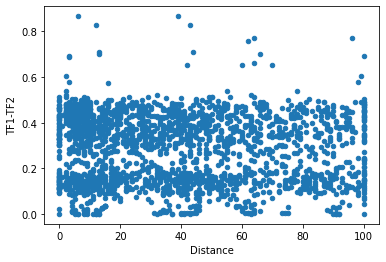

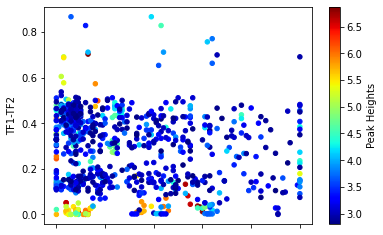

In [41]:
plot_distance_T1_TF2=df_orientation_distance.plot(x ='Distance', y='TF1-TF2', kind = 'scatter')
plot_distance_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF1-TF2', kind = 'scatter', c='Peak Heights', colormap='jet')


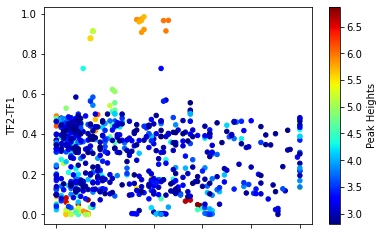

In [42]:
plot_distance_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF2-TF1', kind = 'scatter',c='Peak Heights', colormap='jet')

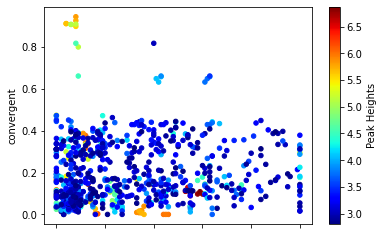

In [43]:
plot_distance_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='convergent', kind = 'scatter',c='Peak Heights', colormap='jet')

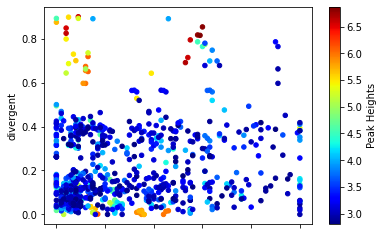

In [44]:
plot_distance_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='divergent', kind = 'scatter',c='Peak Heights', colormap='jet')

In [45]:
#plot_distance=df_orientation_distance.plot(x = ['Distance','Distance','Distance','Distance'], y=['divergent','convergent','TF1-TF2','TF2-TF1'],kind='scatter')


Text(0, 0.5, 'orientation')

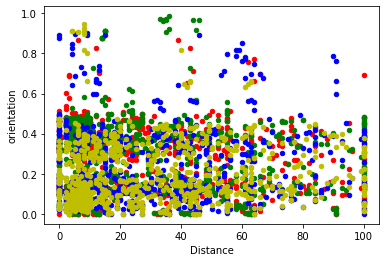

In [46]:
ax1 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF1-TF2', color='r')    
ax2 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF2-TF1', color='g', ax=ax1)    
ax3 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='divergent', color='b', ax=ax1)
ax4 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='convergent', color='y', ax=ax1)
ax1.set_ylabel("orientation")

#print(ax1 == ax2 == ax3 == ax4)


#### how many of the top 50 of each orentaion have a preferential distance

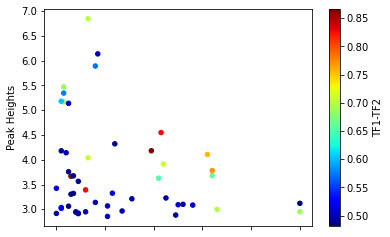

In [52]:
df_top50_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF1-TF2'], ascending=False).head(50)
plot_top50_distance_T1_TF2=df_top50_T1_TF2.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='TF1-TF2', colormap='jet')


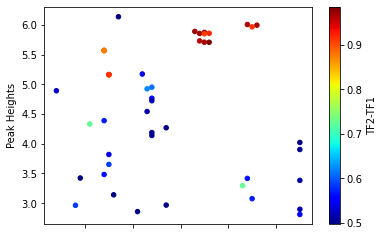

In [53]:
df_top50_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF2-TF1'], ascending=False).head(50)
plot_top50_distance_T2_TF1=df_top50_T2_TF1.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='TF2-TF1', colormap='jet')


In [56]:
#df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF2-TF1'], ascending=False).head(50)

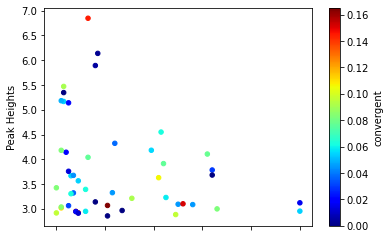

In [49]:
df_top50_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['convergent'], ascending=False).head(50)
plot_top50_distance_convergent=df_top50_T1_TF2.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='convergent', colormap='jet')


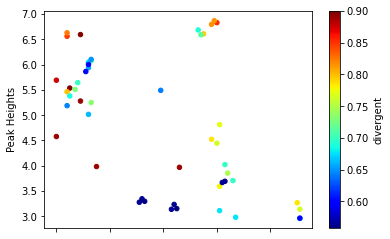

In [54]:
df_top50_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['divergent'], ascending=False).head(50)
plot_top50_distance_divergent=df_top50_divergent.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='divergent', colormap='jet')
